<a href="https://colab.research.google.com/github/SyllerJ/PractiseRepo/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

/content/archive.zip




the following dasaset is used to predict diabetes

Project Definition and Goal:

my goal is to build a model that can accurately predict the risk of early-stage diabetes based on the provided features.

the target variable: This is likely a binary variable indicating the presence or absence of diabetes (e.g., "Positive" or "Negative," "Yes" or "No").

importing dataset


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



**Data Exploration and Preprocessing (EDA)**

---

*   Load the dataset

*   Understand the data:

Examine the dataset's shape (number of rows and columns).
Identify the data types of each column.
Check for missing values and handle them appropriately (imputation or removal).
Analyze the distribution of the target variable (class imbalance).
Explore the statistical properties of the features (mean, median, standard deviation, quartiles).
Visualize the data using histograms, box plots, scatter plots, and correlation matrices to gain insights into feature relationships and potential patterns.


*   Data cleaning:
Handle outliers.
Correct inconsistencies.
Encode categorical features (e.g., using one-hot encoding or label encoding).
Scale or normalize numerical features (e.g., using StandardScaler or MinMaxScaler).
Feature selection or feature engineering. Create new features from existing ones that might improve model performance.

*   Model Development:
Split the data: Divide the dataset into training, validation, and test sets.
Choose appropriate models: Consider various classification algorithms, such as:
Logistic Regression
Decision Trees
Random Forests
Support Vector Machines (SVM)
K-Nearest Neighbors (KNN)
Gradient Boosting Machines (e.g., XGBoost, LightGBM)
Neural Networks.
Train and tune models:
Train each chosen model on the training data.
Use cross-validation on the training set to tune hyperparameters and prevent overfitting.
Use the validation set to further tune the models.
Evaluate model performance:
Evaluate the trained models on the test set using the chosen evaluation metrics.
Compare the performance of different models to select the best one.
Create confusion matrices to visualize the model's performance.
Handle class imbalance: If the dataset is imbalanced (one class significantly outnumbers the other), consider techniques like:
Oversampling (e.g., SMOTE)
Undersampling
Using class weights


*   Model Interpretation and Feature Importance:
Interpret the model: Understand how the model makes predictions and identify the most important features.
Feature importance analysis: Use techniques like feature importance scores from tree-based models or coefficients from linear models to identify the most influential features.
SHAP (SHapley Additive exPlanations): Use SHAP values to explain individual predictions and understand feature contributions.

*   Deployment (Optional):
Create a web application: Use frameworks like Flask or Django to build a web interface for the model.
Deploy the model: Deploy the model to a cloud platform like AWS, Google Cloud, or Heroku.
Create a user interface: Design a user-friendly interface for users to input their data and receive risk predictions.
Create an API: Build an API to allow other applications to use your model.

*   Documentation and Reporting:
Document your code: Add comments and explanations to your code for clarity and maintainability.
Create a report: Summarize your project, including the problem definition, data exploration, model development, evaluation, and conclusions.
Present your findings: Prepare a presentation to showcase your project and findings.

In [9]:
data = pd.read_csv('/content/diabetes_data_upload.csv')

In [10]:
print(data)

     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush visual blurring Itching Irritabi

In [11]:
print(data.shape)

(520, 17)


In [12]:
print(data.info)

<bound method DataFrame.info of      Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush 

In [13]:
print(data.columns)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [14]:
print(data.isnull().sum())

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


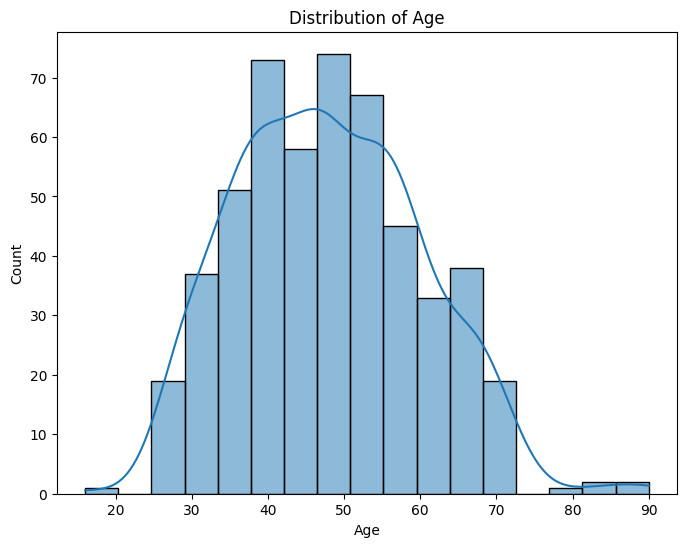

In [17]:
# 2. Visualizations

# Histograms (Numerical feature: Age)
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True)
plt.title("Distribution of Age")
plt.show()

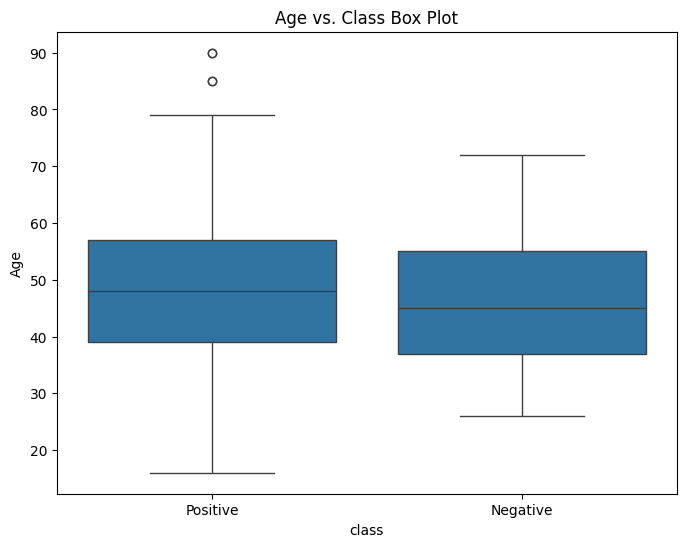

In [18]:
# Box Plots (Age vs. Class)
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='Age', data=data)
plt.title("Age vs. Class Box Plot")
plt.show()

In [22]:
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [23]:
from sklearn.model_selection import train_test_split

X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

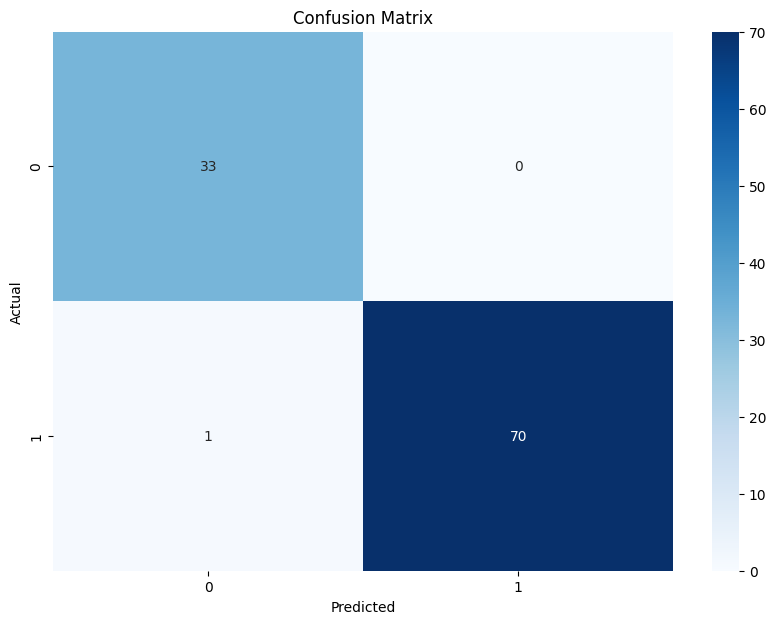

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



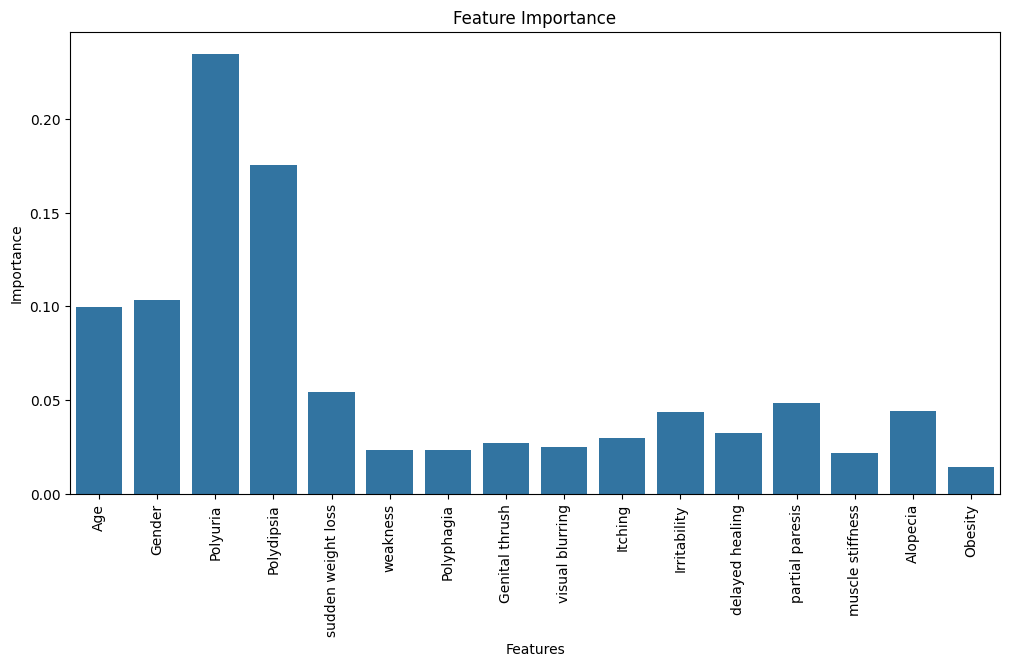

In [28]:
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=features, y=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()